In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

C:\Users\David\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Diretórios das pastas 'no' e 'yes'
folder_path_no = r'C:\Users\David\Desktop\brain_tumor_dataset\no'
folder_path_yes = r'C:\Users\David\Desktop\brain_tumor_dataset\yes'

In [3]:
# Listas para armazenar as imagens
images = []
labels = []  # 0 para 'no', 1 para 'yes'

# Tamanho das imagens
desired_size = (224, 224)

# Função para carregar e pré-processar as imagens
def load_and_preprocess_images(folder_path, label):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            file_path = os.path.join(folder_path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                img = cv2.resize(img, desired_size)
                img_array = np.array(img)
                images.append(img_array)
                labels.append(label)
            else:
                print(f'Ignorando imagem {filename} devido a erro ao carregar a imagem.')

# Chamando a função para carregar as imagens
load_and_preprocess_images(folder_path_no, 0)  # 0 para 'no'
load_and_preprocess_images(folder_path_yes, 1)  # 1 para 'yes'

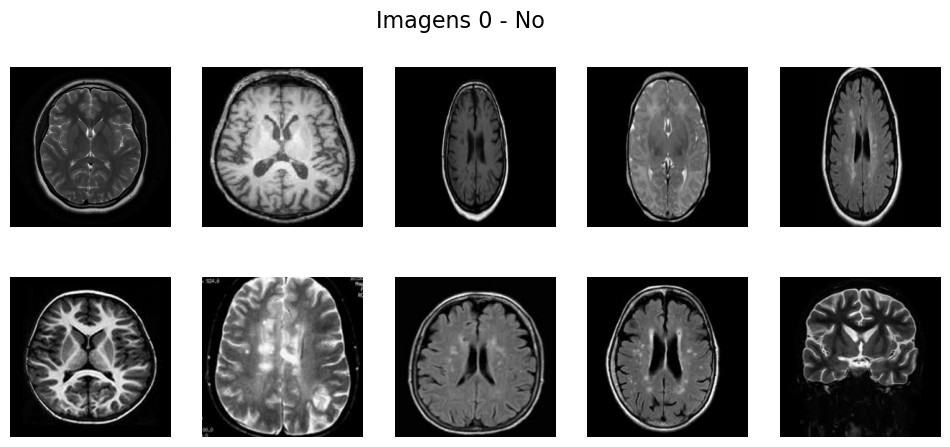

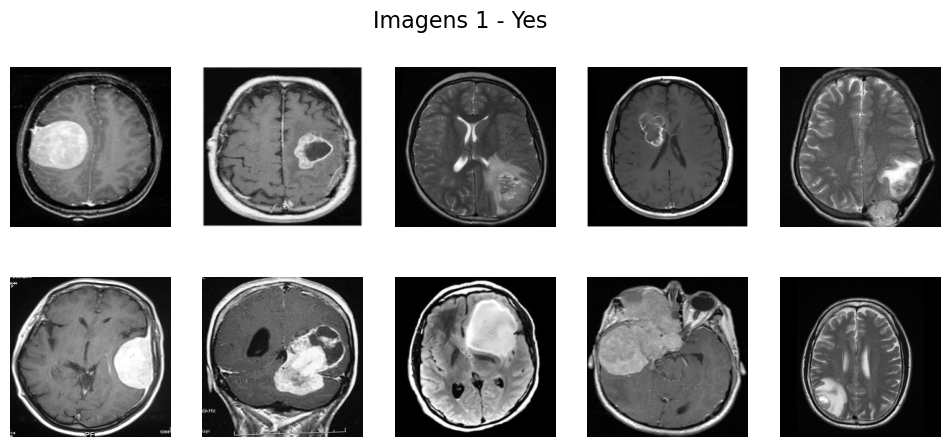

In [4]:
images_no = [images[i] for i in range(len(images)) if labels[i] == 0][:10]
images_yes = [images[i] for i in range(len(images)) if labels[i] == 1][:10]

def plot_images(images, title):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.suptitle(title, fontsize=16)
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
    plt.show()

plot_images(images_no, 'Imagens 0 - No')
plot_images(images_yes, 'Imagens 1 - Yes')

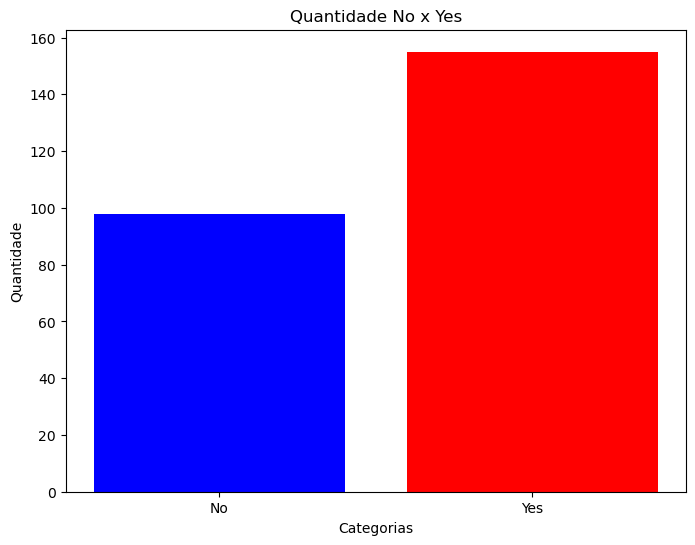

In [5]:
# Conta a quantidade total 0 - no
total_no = labels.count(0)

# Conta a quantidade total 1 - yes
total_yes = labels.count(1)

# Cria uma lista de rótulos para as barras
categorias = ['No', 'Yes']

quant = [total_no, total_yes]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(categorias, quant, color=['blue', 'red'])
plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.title('Quantidade No x Yes')
plt.show()

In [6]:
# Convertendo as listas em arrays NumPy
x = np.array(images)
y = np.array(labels)

In [7]:
# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalizando dos valores de pixel (0-255) para o intervalo (0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
# Definindo o modelo da rede neural
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(desired_size[0], desired_size[1], 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Treinando o modelo
historico = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
6/6 [==============================] - 8s 741ms/step - loss: 2.4862 - accuracy: 0.5342 - val_loss: 2.6309 - val_accuracy: 0.6585
Epoch 2/50
6/6 [==============================] - 1s 201ms/step - loss: 2.6827 - accuracy: 0.6087 - val_loss: 0.5271 - val_accuracy: 0.6829
Epoch 3/50
6/6 [==============================] - 1s 154ms/step - loss: 1.4743 - accuracy: 0.6211 - val_loss: 1.3391 - val_accuracy: 0.3659
Epoch 4/50
6/6 [==============================] - 1s 129ms/step - loss: 1.4846 - accuracy: 0.5217 - val_loss: 0.6557 - val_accuracy: 0.7073
Epoch 5/50
6/6 [==============================] - 1s 166ms/step - loss: 1.2689 - accuracy: 0.5839 - val_loss: 0.6355 - val_accuracy: 0.7073
Epoch 6/50
6/6 [==============================] - 1s 154ms/step - loss: 1.1505 - accuracy: 0.6646 - val_loss: 0.6016 - val_accuracy: 0.7317
Epoch 7/50
6/6 [==============================] - 1s 144ms/step - loss: 0.9946 - accuracy: 0.6584 - val_loss: 0.6834 - val_accuracy: 0.7317
Epoch 8/50
6/6 [====

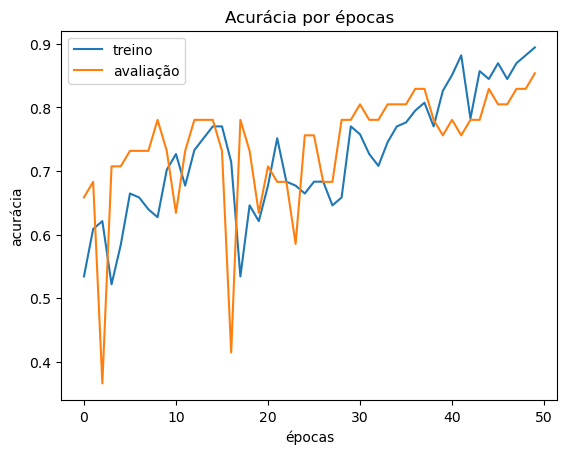

In [11]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'avaliação'])

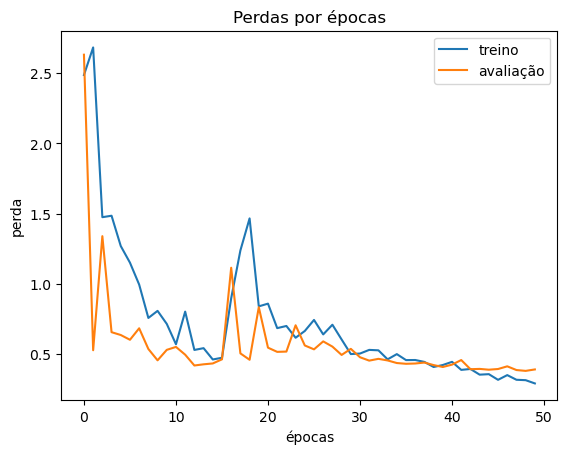

In [12]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'avaliação'])

In [13]:
# Avaliar o modelo no conjunto de testes
test_loss, test_accuracy = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.3739 - accuracy: 0.8824


2/2 [==============================] - 0s 11ms/step


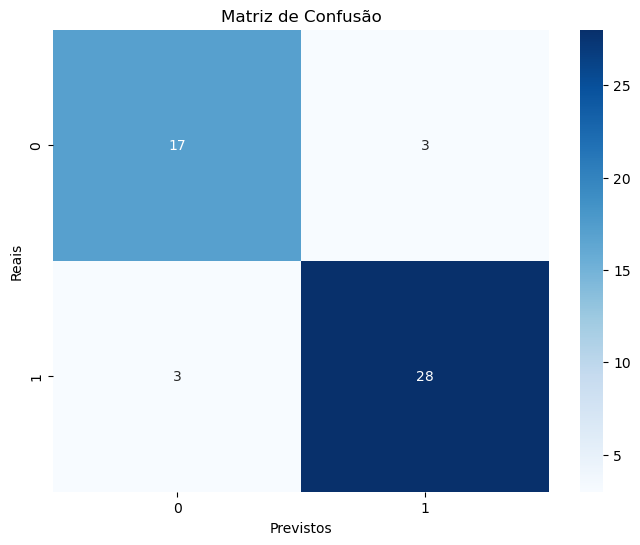

In [14]:
# Calculando a matriz de confusão
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Definindo os rotulos
classes = ['0', '1']

# Plotando a matriz de confusão 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Previstos')
plt.ylabel('Reais')
plt.title('Matriz de Confusão')
plt.show()